# illustrate using Pandas and json IO

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#access a function from the urllib module
from urllib.request import urlretrieve
#also let's use a linux command to see the file size
import os


In [106]:
# needed to handle dates. See Chapter 15
from datetime import datetime,timezone
#adding a new module Pandas. See Chapter 16
import pandas as pd


We will be accessing public data from a commercial site for which I need to disclose that I am involved with the company, Synoptic Data:
- I am on the Board of Directors
- I am a shareholder
- I have a grant from that company to help with their customer support and research and development


In [107]:
# we are using an api (application programming interface) service
# see https://developers.synopticdata.com/mesonet/
# get all temperature observations at the Salt Lake City airport during 2022
# station_id = KSLC
# the variable is defined as "air_temp"
# local times from Midnight New Year's Eve to Midnight last night
# output = csv
# you are using a "token" to obtain access. This token may expire at some future date

In [108]:
url = "https://api.synopticdata.com/v2/stations/timeseries?&token=bace3f05279d4de1bb2f03011843709e&start=202201010700&end=202209220600&obtimezone=local&output=csv&stid=kslc&vars=air_temp"
# define the file to write the data into
filename = "slc_temp.csv"
#let's try to get the file from the web
try:
    #get the file over the web
    urlretrieve(url, filename)
    print("Saved", filename, os.path.getsize(filename)/1000., 'KB')
except:
    print("something wrong grabbing the file")
    print("but the program continues, so may be in error")

Saved slc_temp.csv 2876.563 KB


# STOP!
Launch a terminal window and look at the file uaing more 

How many header lines are there?

Are there any footer lines that need to be removed? How do you check for those?

How many columns in each row of data?

In [109]:
#define the headers
headers = ['STID','Date','TMPC']
#define the data types
dtypes = { 'STID': 'str','Date': 'str', 'TMPC': 'float'}
#what kind of variable is dtypes?

#there may be times with no actual values 
#those will get changed to NaN by the pandas read_csv function by the option na_filter
#Create a pandas dataframe. More about those later. 
#For now, just think about it as an upgrade to a numpy array with an "index" in this case the Date
#handling date strings is always a bit of a hassle, so just accept this for now
#the date will be an index and processing only the temp column
df_kslc = pd.read_csv('slc_temp.csv', parse_dates=['Date'], \
                 date_parser=lambda col: pd.to_datetime(col, utc=True),  \
                 names=headers,dtype = dtypes,na_filter=True,skiprows=8,index_col=['Date'],usecols=['Date','TMPC'])

#and  finally keep the data with the precision that it has
pd.set_option('display.float_format', lambda x: '%.1f' % x)

#display the pandas dataframe 
df_kslc

TMPC
Date                           
2022-01-01 07:00:00+00:00  -9.4
2022-01-01 07:05:00+00:00  -9.4
2022-01-01 07:10:00+00:00  -8.9
2022-01-01 07:15:00+00:00  -7.2
2022-01-01 07:20:00+00:00  -8.3
...                         ...
2022-09-22 05:45:00+00:00  20.0
2022-09-22 05:50:00+00:00  20.0
2022-09-22 05:54:00+00:00  20.0
2022-09-22 05:55:00+00:00  20.0
2022-09-22 06:00:00+00:00  20.6

[82747 rows x 1 columns]

In [110]:
#what are the types in the dataframe
print('index: ',df_kslc.index.dtype,'\n data: ',df_kslc.dtypes)

index:  datetime64[ns, UTC] 
 data:  TMPC    float64
dtype: object


<class 'numpy.ndarray'>


[Text(0.5, 0, 'Temperature C)'), Text(0, 0.5, 'Count')]

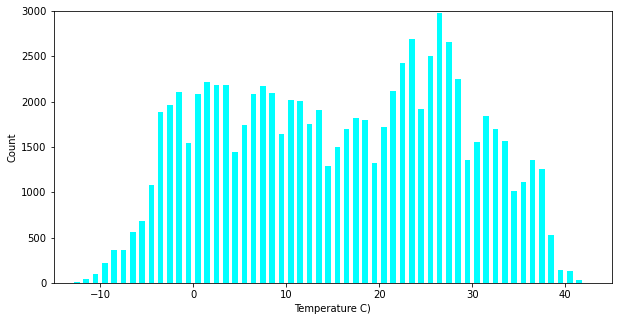

In [111]:
#histogram of KSLC temperature 
#again details about plotting will come later. Chapters 10-14
#use this like a recipe- it works, use it! Experiment by changing values
fig,ax = plt.subplots(1,1,figsize=(10,5))
x1 = np.arange(-15.,45.,1)
# use the actual temperature values
print(type(df_kslc['TMPC'].values))
hist_val1,bins1 = np.histogram(df_kslc['TMPC'].values,bins=x1,range=(x1.min(),x1.max()))
width1 = 0.6 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2

ax.bar(center1,hist_val1,align='center',width=width1,color='cyan')
ax.set(xlim=(-15,45),ylim=(0,3000))
ax.set(xlabel="Temperature C)",ylabel='Count')

# Repeat using json format
json is a file format that uses human-readable text to store and transmit data objects consisting of attribute-value pairs 

Think of it like having the ability to transmit many python values, lists, and dictionaries  where each value is defined in terms of an attribute

In [112]:
#get the json module 
import json

In [113]:
#the Synoptic api service only permits getting 1 station in csv format
#change the output from csv to json and add another station mtmet
url = "https://api.synopticdata.com/v2/stations/timeseries?&token=bace3f05279d4de1bb2f03011843709e&start=202201010700&end=202209220600&obtimezone=local&output=json&stid=kslc,mtmet&vars=air_temp"
# define the file to write the data into
filename = "slc_temp.json"
#let's try if we can get the file from the web
try:
    #get the file over the web
    urlretrieve(url, filename)
    print("Saved", filename, os.path.getsize(filename)/1000., 'KB')
except:
    print("something wrong grabbing the file")
    print("but the program continues, so may be in error")

Saved slc_temp.json 15357.902 KB


# STOP

Look first at the file slc_temp.json using the linux terminal window

Now click on the file to the left with that name that has a "dictionary" type icon {:}

Click on one right pointing arrow so it points down

What do you see?

Click on other ones

Lots of info here! Check it out!

In [114]:
#read the data by opening the file and reading all of it
in_file = open('slc_temp.json').read()
data = json.loads(in_file)
#print(data)

In [115]:
#now lets try to make sense of all the info available by putting it into a pandas dataframe
# the json_normalize function in Pandas flattens the json structure to make it easier to handle
df_json = pd.json_normalize(data,record_path=['STATION'])
#STOP! 
#look at all the columns. Note the row index are the two stations
df_json

STATUS MNET_ID ELEVATION  \
0  ACTIVE       1      4226   
1  ACTIVE     153      4996   

                                                NAME   STID ELEV_DEM  \
0  Salt Lake City, Salt Lake City International A...   KSLC   4235.6   
1                            U of U Mountain Met Lab  MTMET   4993.4   

     LONGITUDE STATE  RESTRICTED  QC_FLAGGED   LATITUDE        TIMEZONE  \
0   -111.96503    UT       False        True   40.77069  America/Denver   
1  -111.828211    UT       False       False  40.766573  America/Denver   

      ID PERIOD_OF_RECORD.start  PERIOD_OF_RECORD.end  \
0     53   1997-01-01T00:00:00Z  2022-09-22T19:35:00Z   
1  33898   2012-04-26T00:00:00Z  2022-09-22T19:40:00Z   

  SENSOR_VARIABLES.air_temp.air_temp_set_1.position UNITS.position  \
0                                               2.0              m   
1                                               2.5              m   

  UNITS.elevation                             OBSERVATIONS.date_time  \
0              ft  [2022-01-01T00:00:00-0700, 2022-01-01T00:05:00...   
1              ft  [2022-01-01T00:00:00-0700, 2022-01-01T00:01:00...   

                         OBSERVATIONS.air_temp_set_1  
0  [-9.4, -9.4, -8.9, -7.2, -8.3, -9.4, -10.0, -1...  
1  [-10.35, -10.411, -10.439, -10.539, -10.6, -10...

In [116]:
#print out all the columns
for col in range(len(df_json.columns)):
    print(col,df_json.columns[col])   

0 STATUS
1 MNET_ID
2 ELEVATION
3 NAME
4 STID
5 ELEV_DEM
6 LONGITUDE
7 STATE
8 RESTRICTED
9 QC_FLAGGED
10 LATITUDE
11 TIMEZONE
12 ID
13 PERIOD_OF_RECORD.start
14 PERIOD_OF_RECORD.end
15 SENSOR_VARIABLES.air_temp.air_temp_set_1.position
16 UNITS.position
17 UNITS.elevation
18 OBSERVATIONS.date_time
19 OBSERVATIONS.air_temp_set_1


In [117]:
#the column of interest is the last one for now

In [118]:
#create a pandas data frame of just the temps
df_temp = df_json['OBSERVATIONS.air_temp_set_1']
#note that we have two rows for the two stations
df_temp

0    [-9.4, -9.4, -8.9, -7.2, -8.3, -9.4, -10.0, -1...
1    [-10.35, -10.411, -10.439, -10.539, -10.6, -10...
Name: OBSERVATIONS.air_temp_set_1, dtype: object

In [119]:
#0 is the index for kslc (0th station)
print(type(df_temp[0]))
temp = np.array(df_temp[0])
print(type(temp),np.size(temp))

<class 'list'>
<class 'numpy.ndarray'> 82747


In [120]:
#there's a problem. some values are None's. And that messes up the histogram. Let's get rid of those
#check to see if we really have None's
print((temp == None).any())
#yep we do
# define a new variable and only use the values that are not None
temp_nonone = temp[temp != None]
print((temp_nonone == None).any())
#no more None's

True
False


[Text(0.5, 0, 'Temperature C)'), Text(0, 0.5, 'Count')]

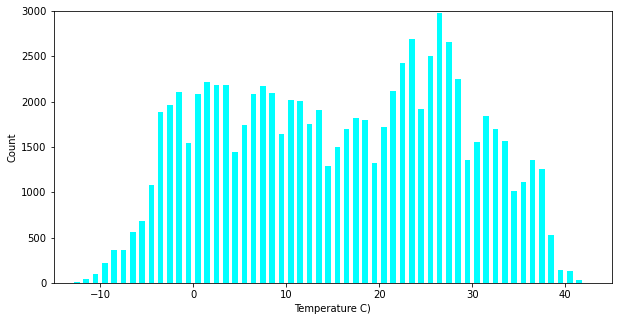

In [121]:
#histogram of KSLC temperature from json file
#again details about plotting will come later
#use this like a recipe- it works, try it!
fig,ax = plt.subplots(1,1,figsize=(10,5))
x1 = np.arange(-15.,45.,1)
hist_val1,bins1 = np.histogram(temp_nonone,bins=x1,range=(x1.min(),x1.max()))
width1 = 0.6 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2

ax.bar(center1,hist_val1,align='center',width=width1,color='cyan')
ax.set(xlim=(-15,45),ylim=(0,3000))
ax.set(xlabel="Temperature C)",ylabel='Count')

In [122]:
#we are getting the same data whether reading from csv or json